<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Water-Quality" data-toc-modified-id="Water-Quality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Water Quality</a></span><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Countries" data-toc-modified-id="Countries-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Countries</a></span></li></ul></li><li><span><a href="#Create-the-datasets" data-toc-modified-id="Create-the-datasets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create the datasets</a></span><ul class="toc-item"><li><span><a href="#NCWP" data-toc-modified-id="NCWP-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>NCWP</a></span></li><li><span><a href="#Nitrogen-Load" data-toc-modified-id="Nitrogen-Load-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Nitrogen Load</a></span></li><li><span><a href="#Nitrogen-Export" data-toc-modified-id="Nitrogen-Export-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Nitrogen Export</a></span></li><li><span><a href="#Rural-Population:" data-toc-modified-id="Rural-Population:-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Rural Population:</a></span></li><li><span><a href="#Quantiles:" data-toc-modified-id="Quantiles:-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Quantiles:</a></span></li></ul></li><li><span><a href="#2D-Scale-for-Data-Global" data-toc-modified-id="2D-Scale-for-Data-Global-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2D Scale for Data Global</a></span></li></ul></li><li><span><a href="#Coastal-Risks" data-toc-modified-id="Coastal-Risks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coastal Risks</a></span><ul class="toc-item"><li><span><a href="#Create-Datasets-for-2d-scale:" data-toc-modified-id="Create-Datasets-for-2d-scale:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Datasets for 2d scale:</a></span></li></ul></li><li><span><a href="#Pollination:" data-toc-modified-id="Pollination:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pollination:</a></span><ul class="toc-item"><li><span><a href="#NCP-:" data-toc-modified-id="NCP-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>NCP :</a></span></li><li><span><a href="#Pollination-dependant-crop-production" data-toc-modified-id="Pollination-dependant-crop-production-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pollination-dependant crop production</a></span></li><li><span><a href="#Lost-crop-production" data-toc-modified-id="Lost-crop-production-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lost crop production</a></span></li><li><span><a href="#Pollination-dependant-population:" data-toc-modified-id="Pollination-dependant-population:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pollination-dependant population:</a></span></li><li><span><a href="#Quantiles:" data-toc-modified-id="Quantiles:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Quantiles:</a></span></li><li><span><a href="#2D-Scale-for-Data-Global:" data-toc-modified-id="2D-Scale-for-Data-Global:-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>2D Scale for Data Global:</a></span></li></ul></li><li><span><a href="#Aggregated-Data" data-toc-modified-id="Aggregated-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aggregated Data</a></span></li></ul></div>

# Imports

In [1]:
import fiona
import pandas as pd
import geopandas as gpd
import csv
import seaborn as sns
import numpy as np

# Water Quality

In [2]:
name_of_file = 'ipbes_ndr_summary_oct_24_md5_da95dbdccf6eaec2b4e1b05437d97b39.gpkg'

layers = fiona.listlayers(name_of_file)
layers

['grid_1_degree', 'correct_countries_on_grid_with_fid', 'Final_WQR_forviz']

## Data exploration

### Countries

In [3]:
countries = gpd.read_file(name_of_file, layer='correct_countries_on_grid_with_fid').drop(columns = ['geometry'])
countries.tail()

,fid,region,country
64795,64795,UNKNOWN,Antarctica
64796,64796,UNKNOWN,Antarctica
64797,64797,UNKNOWN,Antarctica
64798,64798,UNKNOWN,Antarctica
64799,64799,UNKNOWN,Antarctica


In [4]:
geometry = gpd.read_file(name_of_file, layer='grid_1_degree')
geometry = geometry [['GRIDCODE', 'geometry']]
# Fid is gridcode -1 
geometry['GRIDCODE'] = geometry['GRIDCODE'] -1 
geometry.columns = ['fid', 'geometry']
geometry.head()

,fid,geometry
0,0,"POLYGON ((-179 89, -180 89, -180 90, -179 90, ..."
1,1,"POLYGON ((-178 89, -179 89, -179 90, -178 90, ..."
2,2,"POLYGON ((-177 89, -178 89, -178 90, -177 90, ..."
3,3,"POLYGON ((-176 89, -177 89, -177 90, -176 90, ..."
4,4,"POLYGON ((-175 89, -176 89, -176 90, -175 90, ..."


In [5]:
water_data = gpd.read_file(name_of_file, layer='Final_WQR_forviz').drop(columns = ['geometry'])
water_data.head()

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,UN_1,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm
0,9925,13489.0,13489.0,13489.0,13489.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.000029
1,9926,50799.0,50799.0,50799.0,50799.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.000108
2,9927,50799.0,50799.0,50799.0,50799.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.000108
3,9928,50799.0,50799.0,50799.0,50799.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.000108
4,9929,50799.0,50799.0,50799.0,50799.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,0.000108


In [6]:
data = water_data.merge(geometry,on='fid')
countries['fid']=countries['fid'].astype(int)
data = data.merge(countries,on='fid')
data.head(1)

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,...,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm,geometry,region,country
0,9925,13489.0,13489.0,13489.0,13489.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0,NaN,NaN,NaN,0.000029,"POLYGON ((26 62, 25 62, 25 63, 26 63, 26 62))",Eurasia,Finland


In [7]:
def poly_to_lat_long(poly):

    lats = list(poly.exterior.coords.xy[0])
    longs = list(poly.exterior.coords.xy[1])
    return list(zip(lats, longs))

In [8]:
data['geometry'] = data['geometry'].apply(lambda x: poly_to_lat_long(x))

In [9]:
data.columns

Index(['fid', 'PN_c', 'PN_1', 'PN_3', 'PN_5', 'NC_c', 'NC_1', 'NC_3', 'NC_5',
       'UN_c', 'UN_1', 'UN_3', 'UN_5', 'pop_c', 'pop_1', 'pop_3', 'pop_5',
       'PNpop_c_norm', 'geometry', 'region', 'country'],
      dtype='object')

## Create the datasets

In [10]:
def create_dataset(field,percentages,name_of_file): 
        # percentages takes True or False to specify if we want percentages in cur data
        
    if (percentages):
        multiplier = 100
    else:
        multiplier = 1
    dataset = data[[field+'_c','geometry']].copy()
    dataset[field+'_c'] = dataset[field+'_c']*multiplier
    dataset['c_ssp1'] = (data[field+'_1'] - data[field+'_c'])*100/data[field+'_c']
    dataset['c_ssp3'] = (data[field+'_3'] - data[field+'_c'])*100/data[field+'_c']
    dataset['c_ssp5'] = (data[field+'_5'] - data[field+'_c'])*100/data[field+'_c']
    dataset.columns = ['2015','coordinates','SSP1','SSP3','SSP5']
    for i in range(5):
        dataset['lat'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][0])
        dataset['long'+str(i+1)] = dataset.coordinates.apply(lambda x : x[i][1])
    dataset = dataset.dropna()
    dataset = dataset.drop(columns=['coordinates'])
    dataset.to_csv("../Data/"+name_of_file+'.csv', sep=',')
    return dataset

### NCWP

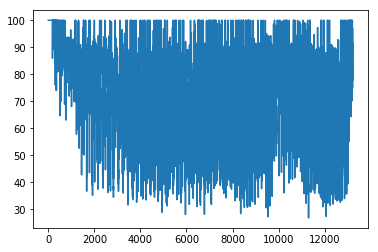

In [11]:
ncwp = create_dataset('NC',True,'nc_degree')
ncwp['2015'].plot();

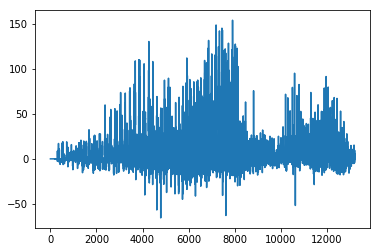

In [12]:
ncwp['SSP1'].plot();

In [13]:
ncwp.head(5)

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
0,100.0,0.0,0.0,0.0,26.0,62.0,25.0,62.0,25.0,63.0,26.0,63.0,26.0,62.0
1,100.0,0.0,0.0,0.0,27.0,62.0,26.0,62.0,26.0,63.0,27.0,63.0,27.0,62.0
2,100.0,0.0,0.0,0.0,28.0,62.0,27.0,62.0,27.0,63.0,28.0,63.0,28.0,62.0
3,100.0,0.0,0.0,0.0,29.0,62.0,28.0,62.0,28.0,63.0,29.0,63.0,29.0,62.0
4,100.0,0.0,0.0,0.0,30.0,62.0,29.0,62.0,29.0,63.0,30.0,63.0,30.0,62.0


In [14]:
ncwp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000
mean,72.222569,6.840810,4.418155,6.066892,23.619902,20.795611,22.619902,20.795611,22.619902,21.795611,23.619902,21.795611,23.619902,20.795611
std,15.592279,18.419346,18.385334,18.723552,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210
min,26.803198,-65.532550,-65.345854,-65.308573,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,61.683405,-0.674733,-2.145223,-1.206735,-56.000000,-2.000000,-57.000000,-2.000000,-57.000000,-1.000000,-56.000000,-1.000000,-56.000000,-2.000000
50%,73.935624,0.042669,-0.009229,0.000325,30.000000,27.000000,29.000000,27.000000,29.000000,28.000000,30.000000,28.000000,30.000000,27.000000
75%,84.564770,8.901112,5.115336,7.214469,91.000000,46.000000,90.000000,46.000000,90.000000,47.000000,91.000000,47.000000,91.000000,46.000000
max,100.000000,153.786614,153.793534,155.434348,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


### Nitrogen Load

In [15]:
data.columns

Index(['fid', 'PN_c', 'PN_1', 'PN_3', 'PN_5', 'NC_c', 'NC_1', 'NC_3', 'NC_5',
       'UN_c', 'UN_1', 'UN_3', 'UN_5', 'pop_c', 'pop_1', 'pop_3', 'pop_5',
       'PNpop_c_norm', 'geometry', 'region', 'country'],
      dtype='object')

In [16]:
tot_nit = create_dataset('PN',False,'n_load_degree')
tot_nit.head()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
0,13489.0,0.0,0.0,0.0,26.0,62.0,25.0,62.0,25.0,63.0,26.0,63.0,26.0,62.0
1,50799.0,0.0,0.0,0.0,27.0,62.0,26.0,62.0,26.0,63.0,27.0,63.0,27.0,62.0
2,50799.0,0.0,0.0,0.0,28.0,62.0,27.0,62.0,27.0,63.0,28.0,63.0,28.0,62.0
3,50799.0,0.0,0.0,0.0,29.0,62.0,28.0,62.0,28.0,63.0,29.0,63.0,29.0,62.0
4,50799.0,0.0,0.0,0.0,30.0,62.0,29.0,62.0,29.0,63.0,30.0,63.0,30.0,62.0


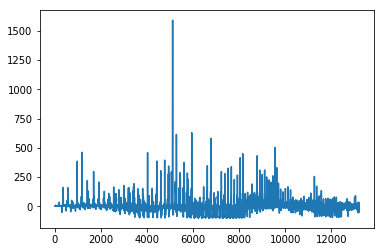

In [17]:
tot_nit['SSP1'].plot();

In [18]:
tot_nit.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.321500e+04,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000,13215.000000
mean,1.623636e+07,-1.291377,7.196608,0.487497,23.619902,20.795611,22.619902,20.795611,22.619902,21.795611,23.619902,21.795611,23.619902,20.795611
std,2.579672e+07,48.572025,49.149258,49.651470,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210,79.034214,28.737210
min,2.800000e+01,-99.837246,-99.840728,-99.837444,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,3.970322e+06,-9.544329,-4.282741,-9.041971,-56.000000,-2.000000,-57.000000,-2.000000,-57.000000,-1.000000,-56.000000,-1.000000,-56.000000,-2.000000
50%,7.924927e+06,-0.263846,3.044135,-0.145281,30.000000,27.000000,29.000000,27.000000,29.000000,28.000000,30.000000,28.000000,30.000000,27.000000
75%,1.715236e+07,4.770871,17.269187,6.362060,91.000000,46.000000,90.000000,46.000000,90.000000,47.000000,91.000000,47.000000,91.000000,46.000000
max,3.294818e+08,1590.554198,851.011663,1120.950177,180.000000,62.000000,179.000000,62.000000,179.000000,63.000000,180.000000,63.000000,180.000000,62.000000


### Nitrogen Export

In [19]:
nit_exp = create_dataset('UN',False,'n_export_degree')
nit_exp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.274600e+04,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000,12746.000000
mean,5.640062e+06,1.707426,16.789069,5.382074,23.422642,19.864114,22.422642,19.864114,22.422642,20.864114,23.422642,20.864114,23.422642,19.864114
std,1.067623e+07,483.982983,485.378897,485.091484,78.629386,28.416278,78.629386,28.416278,78.629386,28.416278,78.629386,28.416278,78.629386,28.416278
min,3.702593e-01,-99.817752,-99.833008,-99.858768,-137.000000,-56.000000,-138.000000,-56.000000,-138.000000,-55.000000,-137.000000,-55.000000,-137.000000,-56.000000
25%,8.802784e+05,-27.298718,-17.318505,-23.671559,-56.000000,-3.000000,-57.000000,-3.000000,-57.000000,-2.000000,-56.000000,-2.000000,-56.000000,-3.000000
50%,2.384244e+06,-2.481183,3.053859,-1.247693,30.000000,26.000000,29.000000,26.000000,29.000000,27.000000,30.000000,27.000000,30.000000,26.000000
75%,5.858008e+06,9.410455,26.905180,13.175903,90.750000,44.000000,89.750000,44.000000,89.750000,45.000000,90.750000,45.000000,90.750000,44.000000
max,1.714816e+08,54180.560303,54179.095459,54237.902832,180.000000,60.000000,179.000000,60.000000,179.000000,61.000000,180.000000,61.000000,180.000000,60.000000


### Rural Population:

In [20]:
rural_pop = create_dataset('pop',False,'rural_pop_degree')
rural_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.177400e+04,1.177400e+04,1.177400e+04,1.177400e+04,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000
mean,3.627011e+05,inf,inf,inf,23.137421,19.757007,22.137421,19.757007,22.137421,20.757007,23.137421,20.757007,23.137421,19.757007
std,9.778222e+05,NaN,NaN,NaN,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846
min,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-136.000000,-56.000000,-137.000000,-56.000000,-137.000000,-55.000000,-136.000000,-55.000000,-136.000000,-56.000000
25%,8.718000e+03,-5.045781e+01,-2.096425e+01,-4.963502e+01,-52.000000,-2.000000,-53.000000,-2.000000,-53.000000,-1.000000,-52.000000,-1.000000,-52.000000,-2.000000
50%,5.754800e+04,-1.921911e+01,7.575603e+00,-1.825901e+01,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,2.542148e+05,5.779685e+00,6.174037e+01,1.889296e+01,86.000000,43.000000,85.000000,43.000000,85.000000,44.000000,86.000000,44.000000,86.000000,43.000000
max,1.667823e+07,inf,inf,inf,180.000000,60.000000,179.000000,60.000000,179.000000,61.000000,180.000000,61.000000,180.000000,60.000000


In [21]:
rural_pop = rural_pop.replace([np.inf, -np.inf], [1000,-1000])
rural_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,1.177400e+04,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000,11774.000000
mean,3.627011e+05,-17.092887,26.308697,-12.151857,23.137421,19.757007,22.137421,19.757007,22.137421,20.757007,23.137421,20.757007,23.137421,19.757007
std,9.778222e+05,50.433704,70.277844,54.617420,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846,76.386716,27.562846
min,0.000000e+00,-100.000000,-100.000000,-100.000000,-136.000000,-56.000000,-137.000000,-56.000000,-137.000000,-55.000000,-136.000000,-55.000000,-136.000000,-56.000000
25%,8.718000e+03,-50.457807,-20.964253,-49.635022,-52.000000,-2.000000,-53.000000,-2.000000,-53.000000,-1.000000,-52.000000,-1.000000,-52.000000,-2.000000
50%,5.754800e+04,-19.219110,7.575603,-18.259015,29.000000,26.000000,28.000000,26.000000,28.000000,27.000000,29.000000,27.000000,29.000000,26.000000
75%,2.542148e+05,5.779685,61.740366,18.892962,86.000000,43.000000,85.000000,43.000000,85.000000,44.000000,86.000000,44.000000,86.000000,43.000000
max,1.667823e+07,1000.000000,1000.000000,1000.000000,180.000000,60.000000,179.000000,60.000000,179.000000,61.000000,180.000000,61.000000,180.000000,60.000000


In [23]:
rural_pop.to_csv("../Data/rural_pop_degree.csv", sep=',')

### Quantiles:

In [22]:
quantile_values = 5 * np.arange(1,21)

quantiles = pd.DataFrame()
for q in quantile_values:
    quantiles.loc['nc_degree',str(q)] =q
    quantiles.loc['tot_nit',str(q)] = tot_nit['2015'].quantile(q/100)
    quantiles.loc['nit_exp',str(q)] = nit_exp['2015'].quantile(q/100)
    quantiles.loc['rural_pop',str(q)] = rural_pop['2015'].quantile(q/100)
quantiles

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
nc_degree,5.000000,1.000000e+01,1.500000e+01,2.000000e+01,2.500000e+01,3.000000e+01,35.000,40.000,4.500000e+01,50.000,55.000,60.00,65.0,70.0,7.500000e+01,80.0,85.00,90.0,95.00,100.0
tot_nit,129492.159375,1.033999e+06,2.459169e+06,3.319284e+06,3.970322e+06,4.829182e+06,5723066.700,6437245.000,7.101727e+06,7924927.000,8952349.300,10340054.00,12262824.8,14543551.2,1.715236e+07,20811913.2,26972304.20,37309503.2,60215492.00,329481760.0
nit_exp,88689.898438,2.998177e+05,4.652893e+05,6.369333e+05,8.802784e+05,1.141391e+06,1396983.375,1692251.875,2.032759e+06,2384243.625,2780910.375,3281639.75,3934603.0,4755564.0,5.858008e+06,7206560.0,9328314.25,12607803.5,21633401.00,171481600.0
rural_pop,339.950000,1.500300e+03,2.944850e+03,5.326800e+03,8.718000e+03,1.302740e+04,19280.650,28157.200,4.004025e+04,57548.000,78660.250,106404.60,140151.5,187349.4,2.542148e+05,355470.6,503257.90,838931.9,1850815.45,16678228.0


In [25]:
quantiles.to_csv('../Data/water_quantiles.csv', sep=',')

In [23]:
pop_quantile_water = rural_pop['2015'].copy().quantile([0, 0.2,0.4,0.6,0.8,1])
pn_quantile_water = tot_nit['2015'].copy().quantile([0, 0.2,0.4,0.6,0.8,1])

## 2D Scale for Data Global

In [24]:
data_water_2d = nit_exp[['lat1','long1','lat2','long2','lat3','long3','lat4','long4','lat5','long5']].copy()
data_water_2d['NCP_cur'] = ncwp['2015'].copy()
data_water_2d['pop'] = pd.cut(rural_pop['2015'].copy(), pop_quantile_water, include_lowest=True, labels=["lowest", "low", "medium", "high", "highest"])
data_water_2d['PN'] =  pd.cut(tot_nit['2015'].copy(), pn_quantile_water, include_lowest=True, labels=["lowest", "low", "medium", "high", "highest"])
data_water_2d['country'] = data['country'].copy()
data_water_2d['PNpop_c_norm'] = data['PNpop_c_norm'].copy()
data_water_2d.head()

,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5,NCP_cur,pop,PN,country,PNpop_c_norm
178,-107.0,60.0,-108.0,60.0,-108.0,61.0,-107.0,61.0,-107.0,60.0,87.809704,NaN,lowest,Canada,0.000551
179,-106.0,60.0,-107.0,60.0,-107.0,61.0,-106.0,61.0,-106.0,60.0,91.406414,NaN,lowest,Canada,0.002067
180,-105.0,60.0,-106.0,60.0,-106.0,61.0,-105.0,61.0,-105.0,60.0,96.171377,NaN,lowest,Canada,0.003030
181,-104.0,60.0,-105.0,60.0,-105.0,61.0,-104.0,61.0,-104.0,60.0,91.029372,NaN,lowest,Canada,0.003020
182,-103.0,60.0,-104.0,60.0,-104.0,61.0,-103.0,61.0,-103.0,60.0,85.941606,NaN,lowest,Canada,0.002495


In [26]:
data_water_2d.to_csv('../Data/data_water_2d.csv', sep=',')

# Coastal Risks

In [27]:
name_of_file = 'CV_outputs_1degree_2019_02_11_md5_c708cc320ea288938ef7d8a8db4e9c35.gpkg'

layers = fiona.listlayers(name_of_file)
layers

['grid_1_degree', 'Final_CRR_forviz']

In [28]:
data_coastal = gpd.read_file(name_of_file, layer='Final_CRR_forviz').drop(columns = ['geometry'])
data_coastal.head()

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,UN_1,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm
0,9715,2.587505,2.904376,3.107431,3.260052,-1.0,-1.0,-1.0,-1.0,2.587505,2.904376,3.107431,3.260052,2.137938,2.137938,2.137938,2.137938,0.361656
1,9716,2.885258,3.238593,3.465013,3.635197,-1.0,-1.0,-1.0,-1.0,2.885258,3.238593,3.465013,3.635197,11.744734,11.744734,11.744734,11.744734,0.403273
2,9717,2.976339,3.340827,3.574395,3.892040,-1.0,-1.0,-1.0,-1.0,2.976339,3.340827,3.574395,3.892040,39.133438,39.133438,39.133438,39.133438,0.416004
3,9718,2.725824,3.059633,3.273542,3.564452,-1.0,-1.0,-1.0,-1.0,2.725824,3.059633,3.273542,3.564452,30.200581,30.200581,30.200581,30.200581,0.380990
4,9719,2.948429,3.309500,3.540878,3.855545,-1.0,-1.0,-1.0,-1.0,2.948429,3.309500,3.540878,3.855545,2.611755,2.611755,2.611755,2.611755,0.412103


In [29]:
data = data_coastal.merge(geometry,on='fid')
data = data.merge(countries,on='fid')
data['geometry'] = data['geometry'].apply(lambda x: poly_to_lat_long(x))
data.head(1)

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,...,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm,geometry,region,country
0,9715,2.587505,2.904376,3.107431,3.260052,-1.0,-1.0,-1.0,-1.0,2.587505,...,3.107431,3.260052,2.137938,2.137938,2.137938,2.137938,0.361656,"[(176.0, 63.0), (175.0, 63.0), (175.0, 64.0), ...",Eurasia,Russia


## Create Datasets for 2d scale:

In [30]:
data.columns

Index(['fid', 'PN_c', 'PN_1', 'PN_3', 'PN_5', 'NC_c', 'NC_1', 'NC_3', 'NC_5',
       'UN_c', 'UN_1', 'UN_3', 'UN_5', 'pop_c', 'pop_1', 'pop_3', 'pop_5',
       'PNpop_c_norm', 'geometry', 'region', 'country'],
      dtype='object')

## Qunatiles for 2d scale

In [31]:
pop_quantile_coastal = data['pop_c'].copy().iloc[data['pop_c'].copy().nonzero()[0]].quantile([0, 0.2,0.4,0.6,0.8,1])
pn_quantile_coastal = data['PN_c'].copy().quantile([0, 0.2,0.4,0.6,0.8,1])

In [32]:
data_coastal_2d = data[['PNpop_c_norm','NC_c','geometry']].copy()
data_coastal_2d.columns = ['PNpop_c_norm','NCP_cur','geometry']
for i in range(5):
    data_coastal_2d['lat'+str(i+1)] = data_coastal_2d.geometry.apply(lambda x : x[i][0])
    data_coastal_2d['long'+str(i+1)] = data_coastal_2d.geometry.apply(lambda x : x[i][1])
data_coastal_2d = data_coastal_2d.dropna()
data_coastal_2d = data_coastal_2d.drop(columns=['geometry'])
data_coastal_2d['pop'] = pd.cut(data['pop_c'].copy(), pop_quantile_coastal, include_lowest=True, labels=["lowest", "low", "medium", "high", "highest"])
data_coastal_2d['PN'] = pd.cut(data['PN_c'].copy(), pn_quantile_coastal, include_lowest=True, labels=["lowest", "low", "medium", "high", "highest"])
data_coastal_2d['country'] = data['country'].copy()
data_coastal_2d.head()

,PNpop_c_norm,NCP_cur,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5,pop,PN,country
0,0.361656,-1.0,176.0,63.0,175.0,63.0,175.0,64.0,176.0,64.0,176.0,63.0,lowest,medium,Russia
1,0.403273,-1.0,177.0,63.0,176.0,63.0,176.0,64.0,177.0,64.0,177.0,63.0,lowest,high,Russia
2,0.416004,-1.0,178.0,63.0,177.0,63.0,177.0,64.0,178.0,64.0,178.0,63.0,lowest,high,Russia
3,0.380990,-1.0,179.0,63.0,178.0,63.0,178.0,64.0,179.0,64.0,179.0,63.0,lowest,medium,Russia
4,0.412103,-1.0,180.0,63.0,179.0,63.0,179.0,64.0,180.0,64.0,180.0,63.0,lowest,high,Russia


In [33]:
data_coastal_2d = data_coastal_2d.drop(data_coastal_2d[data_coastal_2d.NCP_cur == -1].index)
data_coastal_2d.describe()

,PNpop_c_norm,NCP_cur,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000
mean,0.379911,0.099021,35.613312,6.948098,34.613312,6.948098,34.613312,7.948098,35.613312,7.948098,35.613312,6.948098
std,0.063646,0.059453,107.538312,24.250070,107.538312,24.250070,107.538312,24.250070,107.538312,24.250070,107.538312,24.250070
min,0.206136,0.000208,-179.000000,-47.000000,-180.000000,-47.000000,-180.000000,-46.000000,-179.000000,-46.000000,-179.000000,-47.000000
25%,0.336135,0.041475,-73.000000,-10.000000,-74.000000,-10.000000,-74.000000,-9.000000,-73.000000,-9.000000,-73.000000,-10.000000
50%,0.380877,0.109380,77.500000,5.000000,76.500000,5.000000,76.500000,6.000000,77.500000,6.000000,77.500000,5.000000
75%,0.416314,0.156567,127.000000,22.000000,126.000000,22.000000,126.000000,23.000000,127.000000,23.000000,127.000000,22.000000
max,1.000000,0.212290,180.000000,61.000000,179.000000,61.000000,179.000000,62.000000,180.000000,62.000000,180.000000,61.000000


In [34]:
data_coastal_2d.to_csv('../Data/data_coastal_2d.csv', sep=',')

# Pollination:

In [35]:
name_of_file = 'ipbes_pollination_summary_hg_2018-12-06_17%3A36_-0800_340bfd15b50c.gpkg'

layers = fiona.listlayers(name_of_file)
layers

['grid_1_degree', 'correct_countries_on_grid_with_fid', 'Final_POLL_forviz']

In [36]:
poll_data =gpd.read_file(name_of_file, layer='Final_POLL_forviz').drop(columns = ['geometry'])
poll_data.head()

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,UN_1,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm
0,8845,0.000000,0.003262,0.001870,0.043443,0.333333,0.331424,0.332240,0.306977,0.000000,0.002181,0.001248,0.030107,125575,NaN,NaN,NaN,0.003939
1,9204,3399.732141,3404.410279,3404.386435,3306.951139,0.859045,0.855574,0.855591,0.803460,479.207931,491.686198,491.623908,649.949682,69314,78508.0,61138.0,91201.0,0.002307
2,9205,49740.577549,48632.204148,49255.888443,48238.107686,0.522512,0.497960,0.500777,0.467731,23750.552670,24415.330552,24589.665243,25675.645555,0,NaN,NaN,NaN,0.001943
3,9206,6098.744338,5441.641435,5556.810033,5285.471172,0.896613,0.770584,0.772471,0.688556,630.529173,1248.400221,1264.336585,1646.128832,0,0.0,0.0,0.0,0.001098
4,9207,0.000000,0.489428,0.489424,0.489425,1.000000,0.994709,0.994955,0.994255,0.000000,0.002589,0.002469,0.002812,45897,NaN,NaN,NaN,0.001440


In [37]:
data = poll_data.merge(geometry,on='fid')
countries['fid']=countries['fid'].astype(int)
data = data.merge(countries,on='fid')
data['geometry'] = data['geometry'].apply(lambda x: poly_to_lat_long(x))
data.head(1)

,fid,PN_c,PN_1,PN_3,PN_5,NC_c,NC_1,NC_3,NC_5,UN_c,...,UN_3,UN_5,pop_c,pop_1,pop_3,pop_5,PNpop_c_norm,geometry,region,country
0,8845,0.0,0.003262,0.00187,0.043443,0.333333,0.331424,0.33224,0.306977,0.0,...,0.001248,0.030107,125575,NaN,NaN,NaN,0.003939,"[(26.0, 65.0), (25.0, 65.0), (25.0, 66.0), (26...",Eurasia,Finland


In [39]:
data.columns

Index(['fid', 'PN_c', 'PN_1', 'PN_3', 'PN_5', 'NC_c', 'NC_1', 'NC_3', 'NC_5',
       'UN_c', 'UN_1', 'UN_3', 'UN_5', 'pop_c', 'pop_1', 'pop_3', 'pop_5',
       'PNpop_c_norm', 'geometry', 'region', 'country'],
      dtype='object')

## NCP :

In [38]:
ncp = create_dataset('NC',True,'ncp')
ncp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,35.439089,inf,inf,inf,21.303891,19.313799,20.303891,19.313799,20.303891,20.313799,21.303891,20.313799,21.303891,19.313799
std,36.089814,NaN,NaN,NaN,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287
min,0.000000,-100.000000,-100.000000,-100.000000,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,2.981542,-0.486667,-36.806600,-18.436708,-51.000000,-3.000000,-52.000000,-3.000000,-52.000000,-2.000000,-51.000000,-2.000000,-51.000000,-3.000000
50%,19.729198,2.099139,-4.057289,-2.727213,29.000000,25.000000,28.000000,25.000000,28.000000,26.000000,29.000000,26.000000,29.000000,25.000000
75%,66.666667,22.973739,2.201316,0.214470,80.000000,43.000000,79.000000,43.000000,79.000000,44.000000,80.000000,44.000000,80.000000,43.000000
max,100.000016,inf,inf,inf,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [39]:
ncp = ncp.replace([np.inf, -np.inf], [1000,-1000])
ncp.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,8276.000000,8.276000e+03,8.276000e+03,8.276000e+03,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,35.439089,1.029220e+16,9.354086e+14,7.139678e+14,21.303891,19.313799,20.303891,19.313799,20.303891,20.313799,21.303891,20.313799,21.303891,19.313799
std,36.089814,4.841988e+17,4.496055e+16,3.147822e+16,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287,74.969764,27.329287
min,0.000000,-1.000000e+02,-1.000000e+02,-1.000000e+02,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,2.981542,-4.866667e-01,-3.680660e+01,-1.843671e+01,-51.000000,-3.000000,-52.000000,-3.000000,-52.000000,-2.000000,-51.000000,-2.000000,-51.000000,-3.000000
50%,19.729198,2.099139e+00,-4.057289e+00,-2.727213e+00,29.000000,25.000000,28.000000,25.000000,28.000000,26.000000,29.000000,26.000000,29.000000,25.000000
75%,66.666667,2.297374e+01,2.201316e+00,2.144704e-01,80.000000,43.000000,79.000000,43.000000,79.000000,44.000000,80.000000,44.000000,80.000000,43.000000
max,100.000016,2.801152e+19,3.698797e+18,2.549731e+18,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [59]:
ncp.to_csv("../Data/ncp.csv", sep=',')

## Pollination-dependant crop production

In [40]:
potential = create_dataset('PN',False,'potential')
potential.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,7.802000e+03,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000
mean,1.320353e+05,inf,inf,inf,22.192515,19.274673,21.192515,19.274673,21.192515,20.274673,22.192515,20.274673,22.192515,19.274673
std,4.977207e+05,NaN,NaN,NaN,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569
min,-1.225597e-01,-100.000000,-275.798437,-100.000000,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,1.868348e+02,-6.823748,-2.122403,-0.255792,-48.000000,-3.000000,-49.000000,-3.000000,-49.000000,-2.000000,-48.000000,-2.000000,-48.000000,-3.000000
50%,5.323769e+03,-0.518455,0.609996,0.173815,30.000000,25.000000,29.000000,25.000000,29.000000,26.000000,30.000000,26.000000,30.000000,25.000000
75%,6.976383e+04,0.062630,48.579591,38.904556,80.000000,42.000000,79.000000,42.000000,79.000000,43.000000,80.000000,43.000000,80.000000,42.000000
max,2.446651e+07,inf,inf,inf,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [41]:
potential = potential.replace([np.inf, -np.inf], [1000,-1000])
potential.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,7.802000e+03,7802.000000,7.802000e+03,7.802000e+03,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000,7802.000000
mean,1.320353e+05,120.660903,1.427583e+05,1.411002e+05,22.192515,19.274673,21.192515,19.274673,21.192515,20.274673,22.192515,20.274673,22.192515,19.274673
std,4.977207e+05,3987.532870,1.193245e+07,1.185450e+07,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569,74.421659,27.270569
min,-1.225597e-01,-100.000000,-2.757984e+02,-1.000000e+02,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,1.868348e+02,-6.823748,-2.122403e+00,-2.557924e-01,-48.000000,-3.000000,-49.000000,-3.000000,-49.000000,-2.000000,-48.000000,-2.000000,-48.000000,-3.000000
50%,5.323769e+03,-0.518455,6.099964e-01,1.738148e-01,30.000000,25.000000,29.000000,25.000000,29.000000,26.000000,30.000000,26.000000,30.000000,25.000000
75%,6.976383e+04,0.062630,4.857959e+01,3.890456e+01,80.000000,42.000000,79.000000,42.000000,79.000000,43.000000,80.000000,43.000000,80.000000,42.000000
max,2.446651e+07,303525.891131,1.053469e+09,1.046625e+09,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [51]:
potential.to_csv("../Data/potential.csv", sep=',')

## Lost crop production

In [42]:
un = create_dataset('UN',False,'unmet_need')
un.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,7.842000e+03,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,1.124923e+05,inf,inf,inf,22.194083,19.292145,21.194083,19.292145,21.194083,20.292145,22.194083,20.292145,22.194083,19.292145
std,4.680060e+05,NaN,NaN,NaN,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126
min,0.000000e+00,-100.000000,-100.000000,-100.000000,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,5.680581e+01,-17.809420,-3.352685,-0.116666,-48.000000,-3.000000,-49.000000,-3.000000,-49.000000,-2.000000,-48.000000,-2.000000,-48.000000,-3.000000
50%,2.968053e+03,-3.056403,5.491962,3.673097,30.000000,25.000000,29.000000,25.000000,29.000000,26.000000,30.000000,26.000000,30.000000,25.000000
75%,4.949771e+04,0.000000,86.865777,59.837758,80.000000,42.000000,79.000000,42.000000,79.000000,43.000000,80.000000,43.000000,80.000000,42.000000
max,2.322062e+07,inf,inf,inf,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [43]:
un = un.replace([np.inf, -np.inf], [1000,-1000])
un.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,7.842000e+03,7.842000e+03,7.842000e+03,7.842000e+03,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,1.124923e+05,8.799632e+02,2.548146e+05,2.011370e+05,22.194083,19.292145,21.194083,19.292145,21.194083,20.292145,22.194083,20.292145,22.194083,19.292145
std,4.680060e+05,2.958828e+04,1.316179e+07,1.164845e+07,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126,74.463979,27.262126
min,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,5.680581e+01,-1.780942e+01,-3.352685e+00,-1.166663e-01,-48.000000,-3.000000,-49.000000,-3.000000,-49.000000,-2.000000,-48.000000,-2.000000,-48.000000,-3.000000
50%,2.968053e+03,-3.056403e+00,5.491962e+00,3.673097e+00,30.000000,25.000000,29.000000,25.000000,29.000000,26.000000,30.000000,26.000000,30.000000,25.000000
75%,4.949771e+04,0.000000e+00,8.686578e+01,5.983776e+01,80.000000,42.000000,79.000000,42.000000,79.000000,43.000000,80.000000,43.000000,80.000000,42.000000
max,2.322062e+07,1.464896e+06,1.050837e+09,9.988741e+08,178.000000,65.000000,177.000000,65.000000,177.000000,66.000000,178.000000,66.000000,178.000000,65.000000


In [54]:
un.to_csv("../Data/unmet_need.csv", sep=',')

## Pollination-dependant population:

In [44]:
pol_pop = create_dataset('pop',False,'pol_pop')
pol_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,4.759000e+03,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000
mean,8.605396e+05,inf,inf,inf,22.336625,15.569447,21.336625,15.569447,21.336625,16.569447,22.336625,16.569447,22.336625,15.569447
std,1.969402e+06,NaN,NaN,NaN,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195
min,0.000000e+00,-100.000000,-100.000000,-100.000000,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,6.869000e+04,-0.270401,6.208712,-3.042266,-41.000000,-6.000000,-42.000000,-6.000000,-42.000000,-5.000000,-41.000000,-5.000000,-41.000000,-6.000000
50%,2.419490e+05,20.606917,37.459503,20.551074,30.000000,16.000000,29.000000,16.000000,29.000000,17.000000,30.000000,17.000000,30.000000,16.000000
75%,7.518670e+05,55.590752,104.146295,59.178491,74.000000,38.000000,73.000000,38.000000,73.000000,39.000000,74.000000,39.000000,74.000000,38.000000
max,3.046985e+07,inf,inf,inf,178.000000,64.000000,177.000000,64.000000,177.000000,65.000000,178.000000,65.000000,178.000000,64.000000


In [45]:
pol_pop = pol_pop.replace([np.inf, -np.inf], [1000,-1000])
pol_pop.describe()

,2015,SSP1,SSP3,SSP5,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5
count,4.759000e+03,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000
mean,8.605396e+05,80.725241,108.281290,79.185214,22.336625,15.569447,21.336625,15.569447,21.336625,16.569447,22.336625,16.569447,22.336625,15.569447
std,1.969402e+06,1269.822383,1269.010269,1270.816305,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195,69.508432,26.116195
min,0.000000e+00,-100.000000,-100.000000,-100.000000,-124.000000,-47.000000,-125.000000,-47.000000,-125.000000,-46.000000,-124.000000,-46.000000,-124.000000,-47.000000
25%,6.869000e+04,-0.270401,6.208712,-3.042266,-41.000000,-6.000000,-42.000000,-6.000000,-42.000000,-5.000000,-41.000000,-5.000000,-41.000000,-6.000000
50%,2.419490e+05,20.606917,37.459503,20.551074,30.000000,16.000000,29.000000,16.000000,29.000000,17.000000,30.000000,17.000000,30.000000,16.000000
75%,7.518670e+05,55.590752,104.146295,59.178491,74.000000,38.000000,73.000000,38.000000,73.000000,39.000000,74.000000,39.000000,74.000000,38.000000
max,3.046985e+07,82758.139535,82730.232558,82790.697674,178.000000,64.000000,177.000000,64.000000,177.000000,65.000000,178.000000,65.000000,178.000000,64.000000


In [57]:
pol_pop.to_csv("../Data/pol_pop.csv", sep=',')

## Quantiles:

In [46]:
quantile_values = 5 * np.arange(1,21)

quantiles = pd.DataFrame()
for q in quantile_values:
    quantiles.loc['ncp',str(q)] =q
    quantiles.loc['potential',str(q)] = potential['2015'].quantile(q/100)
    quantiles.loc['unmet_need',str(q)] = un['2015'].quantile(q/100)
    quantiles.loc['pol_pop',str(q)] = pol_pop['2015'].quantile(q/100)
quantiles

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
ncp,5.000000,10.000000,15.000000,20.000000,25.000000,30.000000,35.000000,40.000000,45.000000,50.000000,55.000000,60.000000,65.000000,70.000000,75.000000,8.000000e+01,8.500000e+01,9.000000e+01,9.500000e+01,1.000000e+02
potential,0.559691,6.010710,27.289734,76.708038,186.834766,448.940108,852.603642,1630.712524,3024.361877,5323.769421,9214.312844,15341.704925,24805.607167,41112.412897,69763.830053,1.195831e+05,1.997203e+05,3.524633e+05,5.896215e+05,2.446651e+07
unmet_need,0.063103,0.949748,5.020155,20.520448,56.805806,147.066671,364.446501,785.403887,1589.796617,2968.052867,5159.188585,9474.907129,15962.418305,28273.501853,49497.706175,8.753275e+04,1.545647e+05,2.786537e+05,4.932613e+05,2.322062e+07
pol_pop,4051.400000,15745.400000,29461.800000,47927.800000,68690.000000,92615.400000,122497.700000,153747.800000,193121.400000,241949.000000,295960.300000,360682.800000,449305.600000,573966.000000,751867.000000,1.018440e+06,1.390672e+06,2.063546e+06,3.793890e+06,3.046985e+07


In [59]:
quantiles.to_csv('../Data/pollination_quantiles.csv', sep=',')

In [47]:
pop_quantile_pol = pol_pop['2015'].copy().quantile([0, 0.2,0.4,0.6,0.8,1])
pn_quantile_pol = potential['2015'].copy().quantile([0, 0.2,0.4,0.6,0.8,1])

## 2D Scale for Data Global:

In [48]:
data_pol_2d = un[['lat1','long1','lat2','long2','lat3','long3','lat4','long4','lat5','long5']].copy()
data_pol_2d['NCP_cur'] = ncp['2015'].copy()
data_pol_2d['PNpop_c_norm'] = data['PNpop_c_norm'].copy()
data_pol_2d['pop'] = pd.cut(data['pop_c'].copy(), pop_quantile_pol,include_lowest=True, labels=["lowest", "low", "medium", "high", "highest"])
data_pol_2d['PN'] = pd.cut(potential['2015'].copy(), pn_quantile_pol, include_lowest=True,labels=["lowest", "low", "medium", "high", "highest"])
data_pol_2d['country'] = data['country'].copy()
data_pol_2d.head()


,lat1,long1,lat2,long2,lat3,long3,lat4,long4,lat5,long5,NCP_cur,PNpop_c_norm,pop,PN,country
0,26.0,65.0,25.0,65.0,25.0,66.0,26.0,66.0,26.0,65.0,33.333329,0.003939,low,lowest,Finland
1,25.0,64.0,24.0,64.0,24.0,65.0,25.0,65.0,25.0,64.0,85.904539,0.002307,low,medium,Finland
2,26.0,64.0,25.0,64.0,25.0,65.0,26.0,65.0,26.0,64.0,52.251152,0.001943,lowest,high,Finland
3,27.0,64.0,26.0,64.0,26.0,65.0,27.0,65.0,27.0,64.0,89.661328,0.001098,lowest,medium,Finland
4,28.0,64.0,27.0,64.0,27.0,65.0,28.0,65.0,28.0,64.0,99.999996,0.001440,lowest,lowest,Finland


In [49]:
data_pol_2d.to_csv('.zData/data_pol_2d.csv', sep=',')

# Aggregated Data

In [76]:
va = pd.read_csv('../Data/country_va.csv').iloc[:,1:]
en = pd.read_csv('../Data/country_en.csv').iloc[:,1:]
fo = pd.read_csv('../Data/country_fo.csv').iloc[:,1:]

In [77]:
fo.head()

,name,iso3,1850,1900,1910,1945,1980,2015,SSP1,SSP3,SSP5
0,Afghanistan,AFG,15.968228,15.746076,17.071392,25.743165,21.911013,21.003291,22.133418,13.282405,17.579873
1,Albania,ALB,31.984000,17.074000,15.868000,17.974000,24.046000,33.282000,36.340000,36.000000,31.626000
2,Algeria,DZA,37.554242,20.630606,18.828788,18.845152,9.092727,8.730909,1.064848,1.547273,7.813333
3,Angola,AGO,8.312917,8.876750,10.418333,19.224500,32.360750,51.235667,63.469917,6.520833,44.756667
4,Argentina,ARG,51.136267,47.502089,43.568533,35.052089,26.280533,23.175956,26.968356,21.241244,22.076533


In [78]:
aggregated_country = fo[['name','iso3']].copy()

In [79]:
columns = ['1850','1900','1910','1945','1980','2015','SSP1','SSP3','SSP5']
for col in columns:
    aggregated_country[col] = (va[col]+fo[col]+en[col])/3
    
aggregated_country.head(1)

,name,iso3,1850,1900,1910,1945,1980,2015,SSP1,SSP3,SSP5
0,Afghanistan,AFG,14.911899,14.704979,16.469325,24.826414,21.035105,20.108861,21.537004,12.698017,17.022954


In [80]:
aggregated_country.to_csv('../Data/aggregated_country.csv', sep=',')